# Chargement des données : 
# Projet de classification d'images d'avions commerciaux et militaires 
### Auteurs : Groupe 5

*Faical Toubali Hadaoui*

*Mehdi Sensali*

*Ignacio Lucas Oros Campo*

*Thibaud Merieux*

*Cédric Martin*


<br>Dans notre projet **"Airplanes Image Classification"**, nous avons choisi de classifier les images d'avions militaires/commerciaux  selon deux version :


<br>**Première version** : Images d'avions associées à 2 labels différents : Deux classes **Militaire** et **Commercial**.

<br>**Deuxième version** : Images d'avions associées à N labels différents correspondant aux différents modèles d'avions militiaires/commerciaux que notre base de données contient. 

![<Photo>](https://zupimages.net/up/21/11/spon.png)

La base de données a un nombre totale d'images de l'ordre de 4000. à savoir, en moyenne 400 images dans chaque modèle d'avion commercial/militaire qui sont les suivant : 

Militaire :
- Dassault Rafale
- Lockheed Martin F-35 Lightning  II
- Eurofighter Typhoon
- Soukoi Su-57
- A400M Atlas d'Airbus

Commerciale :
- Airbus A380
- Airbus Belluga
- Boeing 747
- Boeing 777
- Dassault Falcon 8X

<br>Les deux versions sons réalisés sur ce notebook:.


--------------------------------------------------------------------------------

<br>**Première version**: 
Nous avons réparti les images dans 3 ensembles (et donc 3 dossiers): 

***Train*** : se compose de 70%  de la base de données totale, par conséquent, 70% d'images de chaque modèle d'avions. 

***Validation*** : se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.

***Test*** se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.


<br>Chacun de ces dossiers comporte un sous-dossier par classe (Commerciale/ Militaire), qui contient lui meme les images des différents modèles d'avions. L'arborescence est résumée sur l'image ci-dessus.

--------------------------------------------------------------------------------


<br>**Deuxième version**: 
Nous avons réparti les images dans 3 ensembles (et donc 3 dossiers): 

***Train*** : se compose de 70%  de la base de données totale, par conséquent, 70% d'images de chaque modèle d'avions. 

***Validation*** : se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.

***Test*** se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.



<br>Chacun de ces dossiers comporte deux sous-dossiers (Commerciale/Militaire) qui se composent eux memes des différents modèles d'avions. Ainsi, dans cette version nous aurons autant de labels qu'autant des N classes correspondants aux différents modèles d'avions. Les labels seront de la forme suivante : (Type/Modèle). Par exemple :

<br>Commercial/Airbus_A380 ou Military/Rafale. 

<br>Ainsi, le nombre de labels va correspondre à la somme de chaque type(Commercial/Militaire) multiplié par le nombre de modèles d'avions qu'il contint. Puisque nous avons 5 modèles d'avions par type (Commercial/Militaire) nous aurons  alors 10 labels.

--------------------------------------------------------------------------------


<br>Nous avons choisi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide.

[Lien de GitHub vers notre repository](https://github.com/faicaltoubali/Airplanes_Image_Classification)

In [1]:
!git clone https://github.com/faicaltoubali/Airplanes_Image_Classification.git
path = "./Airplanes_Image_Classification/"

Cloning into 'Airplanes_Image_Classification'...
remote: Enumerating objects: 492, done.
remote: Counting objects: 100% (492/492), done.
remote: Compressing objects: 100% (363/363), done.
remote: Total 4018 (delta 197), reused 398 (delta 120), pack-reused 3526
Receiving objects: 100% (4018/4018), 651.07 MiB | 45.24 MiB/s, done.
Resolving deltas: 100% (224/224), done.
Checking out files: 100% (7087/7087), done.


Maintenant que les données sont téléchargées localement depuis Google Colab, nous allons charger les images et les labels. 

#Version 1 : Classification binaire :    Commercial/Militaire

In [2]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):


    num_images = 0

    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        for j in range(len(dirs)):
          dirs_modeles = sorted(os.listdir(data_path + dataset + '/' + classes[i] + '/' + dirs[j]))
          num_images += len(dirs_modeles)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    x_def = np.zeros((num_images, 1))

    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        for j in range(len(dirs)):
          dirs_modeles = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j]))
 
          # Chargement des images, 
          for idx_img in range(len(dirs_modeles)):
            item = dirs_modeles[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j] + '/' +item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j] + '/' + item)
                img = img.convert('RGB')

                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))

                x[current_index] = np.asarray(img) 
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

In [3]:
labels = ['Commercial', 'Military']

x_train, y_train = load_data(path, labels, dataset='Dataset/Train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='Dataset/Validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='Dataset/Test', image_size=64)
print(x_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(2519, 64, 64, 3) (2519, 1)
(523, 64, 64, 3) (523, 1)
(526, 64, 64, 3) (526, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

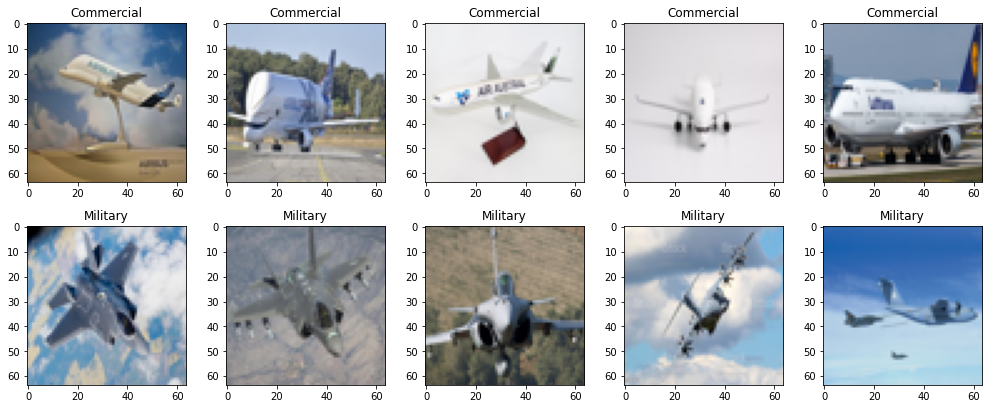

In [6]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 14))

#shuffle_indices = np.random.permutation(1000)
random_commercialplanes_indices = random.sample(range(1, 1000), 5)
random_militaryplanes_indices = random.sample(range(1001, 2519 ), 5)
shuffle_indices = random_commercialplanes_indices + random_militaryplanes_indices

for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

#Version 2 : Classification multi-classes : 10 labels différents correspondant aux différents modèles d'avions militiaires/commerciaux que contient notre base de données :


In [7]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data2(data_path, classes, dataset='train', image_size=64):


    num_images = 0

    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    x_def = np.zeros((num_images, 1))

    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))

        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

In [8]:
labels2 = ['Commercial/Airbus_A380', 'Commercial/Airbus_Belluga', 'Commercial/Boeing_747', 'Commercial/Boeing_777', 'Commercial/Falcon_8x',
          'Military/A400M', 'Military/Eurofighter_Typhoon', 'Military/Rafale', 'Military/F-35', 'Military/Su-57']

x2_train, y2_train = load_data2(path, labels2, dataset='Dataset/Train', image_size=64)
print(x2_train.shape, y2_train.shape)

x2_val, y2_val = load_data2(path, labels2, dataset='Dataset/Validation', image_size=64)
print(x2_val.shape, y2_val.shape)

x2_test, y2_test = load_data2(path, labels2, dataset='Dataset/Test', image_size=64)
print(x2_test.shape, y2_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(2519, 64, 64, 3) (2519, 1)
(523, 64, 64, 3) (523, 1)
(526, 64, 64, 3) (526, 1)


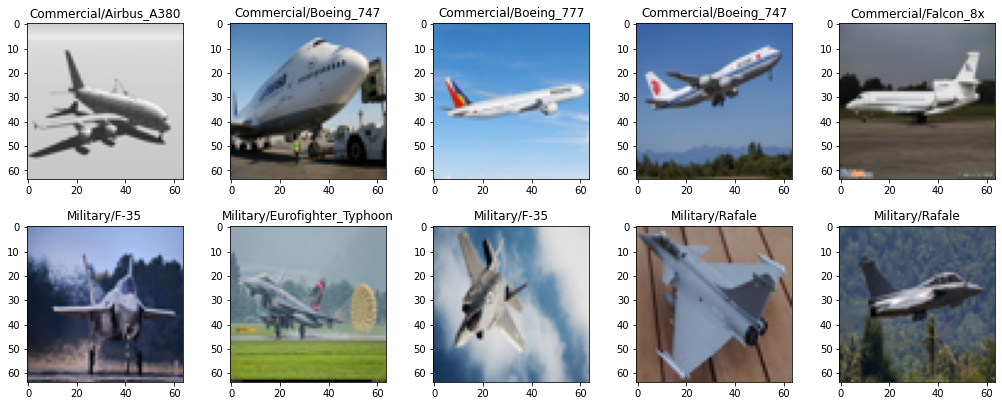

In [17]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 14))

random_commercialplanes_indices2 = random.sample(range(1, 1000), 5)
random_militaryplanes_indices2 = random.sample(range(1001, 2519), 5)
shuffle_indices2 = random_commercialplanes_indices2 + random_militaryplanes_indices2

for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    image2 = x2_train[shuffle_indices2[i]]
    plt.title(labels2[int(y2_train[shuffle_indices2[i]])])
    plt.imshow(image2/255)

plt.tight_layout()
plt.show()